### Ch12_2_1.py

In [1]:
import pandas as pd

# 載入Google股價的訓練資料集
df_train = pd.read_csv("GOOG_Stock_Price_Train.csv",
                       index_col="Date",parse_dates=True)
print(df_train.head())
df_train.head().to_html("Ch12_2_1.html")

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03  324.360352  331.916199  324.077179  330.555054  330.555054   
2012-01-04  330.366272  332.959412  328.175537  331.980774  331.980774   
2012-01-05  328.925659  329.839722  325.994720  327.375732  327.375732   
2012-01-06  327.445282  327.867523  322.795532  322.909790  322.909790   
2012-01-09  321.161163  321.409546  308.607819  309.218842  309.218842   

              Volume  
Date                  
2012-01-03   7400800  
2012-01-04   5765200  
2012-01-05   6608400  
2012-01-06   5420700  
2012-01-09  11720900  


### Ch12_2_1a.py

In [2]:
import numpy as np
import pandas as pd

# 載入Google股價的訓練資料集
df_train = pd.read_csv("GOOG_Stock_Price_Train.csv",
                       index_col="Date",parse_dates=True)
X_train_set = df_train.iloc[:,4:5].values  # Adj Close欄位
X_train_len = len(X_train_set)
print("筆數: ", X_train_len)
# 產生特徵資料和標籤資料
def create_dataset(ds, look_back=1):
    X_data, Y_data = [],[]
    for i in range(len(ds)-look_back):
        X_data.append(ds[i:(i+look_back), 0])
        Y_data.append(ds[i+look_back, 0])
    
    return np.array(X_data), np.array(Y_data)

look_back = 60
X_train, Y_train = create_dataset(X_train_set, look_back)
print("回看天數:", look_back)
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print(X_train[0])
print(X_train[1])
print(Y_train[0])

筆數:  1258
回看天數: 60
X_train.shape:  (1198, 60)
Y_train.shape:  (1198,)
[330.555054 331.980774 327.375732 322.90979  309.218842 309.556641
 310.95752  312.785645 310.475647 312.259064 314.410065 317.718536
 291.101654 290.868195 288.588013 282.904968 282.214478 288.116089
 286.978485 288.180664 288.53833  290.66452  296.238251 302.577026
 301.42453  302.954559 303.754364 300.997314 304.121979 302.909851
 300.823425 301.300323 300.366394 305.016174 302.005737 301.096649
 302.979401 302.68631  307.196991 307.127441 309.189026 308.617737
 305.14035  300.52536  301.439423 301.608337 298.185577 300.619751
 306.893951 306.00473  308.558136 310.500488 314.94162  314.698181
 317.922211 320.937622 319.218781 322.567017 321.419464 325.76123 ]
[331.980774 327.375732 322.90979  309.218842 309.556641 310.95752
 312.785645 310.475647 312.259064 314.410065 317.718536 291.101654
 290.868195 288.588013 282.904968 282.214478 288.116089 286.978485
 288.180664 288.53833  290.66452  296.238251 302.577026 301

### Ch12_2_2.py

回看天數: 60
X_train.shape:  (1198, 60, 1)
Y_train.shape:  (1198,)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________

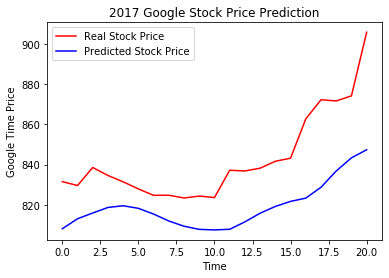

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
%matplotlib inline

np.random.seed(10)  # 指定亂數種子
# 載入Google股價的訓練資料集
df_train = pd.read_csv("GOOG_Stock_Price_Train.csv",
                       index_col="Date",parse_dates=True)
X_train_set = df_train.iloc[:,4:5].values  # Adj Close欄位
# 特徵標準化 - 正規化
sc = MinMaxScaler() 
X_train_set = sc.fit_transform(X_train_set)
# 取出幾天前股價來建立成特徵和標籤資料集
def create_dataset(ds, look_back=1):
    X_data, Y_data = [],[]
    for i in range(len(ds)-look_back):
        X_data.append(ds[i:(i+look_back), 0])
        Y_data.append(ds[i+look_back, 0])
    
    return np.array(X_data), np.array(Y_data)

look_back = 60
print("回看天數:", look_back)
# 分割成特徵資料和標籤資料
X_train, Y_train = create_dataset(X_train_set, look_back)
# 轉換成(樣本數, 時步, 特徵)張量
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
# 定義模型
model = Sequential()
model.add(LSTM(50, return_sequences=True, 
               input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="mse", optimizer="adam")
# 訓練模型
model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=0)
# 使用模型預測股價 - 2017年1~3月預測 4 月份股價
df_test = pd.read_csv("GOOG_Stock_Price_Test.csv")
X_test_set = df_test.iloc[:,4:5].values
# 產生特徵資料和標籤資料
X_test, Y_test = create_dataset(X_test_set, look_back)
X_test = sc.transform(X_test)
# 轉換成(樣本數, 時步, 特徵)張量
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test_pred = model.predict(X_test)
# 將預測值轉換回股價
X_test_pred_price = sc.inverse_transform(X_test_pred)
# 繪出股價圖表
import matplotlib.pyplot as plt

plt.plot(Y_test, color="red", label="Real Stock Price")
plt.plot(X_test_pred_price, color="blue", label="Predicted Stock Price")
plt.title("2017 Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Time Price")
plt.legend()
plt.show()